In [1]:
# Module Importations
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Project Module Importations
from GensetSimulation.data_analytics.src.data import cosmos_client_manager
from GensetSimulation.data_analytics.src.data import load_data
from GensetSimulation.data_analytics.src.features import data_munging

In [3]:
# Constants (i.e. for saving figures)

In [3]:
# Load data from database
client = cosmos_client_manager.intialise_client()
database = cosmos_client_manager.return_database(client)
container = cosmos_client_manager.return_container(database)
item_list = cosmos_client_manager.read_items(container)

Database with id 'BMRS Data' was found, link is dbs/BMRS Data
Container with id 'DataElement' was found, link is dbs/BMRS Data/colls/DataElement
Reading all items in container
Found 22924 items


In [4]:
# Convert to dataframe
df_items = load_data.convert_dict_to_dataframe(item_list)

NameError: name 'item_list' is not defined

In [3]:
# Save dataframe locally
load_data.save_local_dataframe(df_items)

NameError: name 'df_items' is not defined

In [3]:
# Load data from local store
df_new = load_data.load_local_dataframe()

Loaded local dataframe ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22924 entries, 0 to 22923
Data columns (total 19 columns):
id              22924 non-null object
docType         22924 non-null object
busType         22924 non-null object
proType         22924 non-null object
timeId          22924 non-null object
quantity        22924 non-null object
curveType       22924 non-null object
resolution      22924 non-null object
setDate         22924 non-null object
setPeriod       22924 non-null object
powType         22924 non-null object
actFlag         22924 non-null object
docId           22924 non-null object
docRevNum       22924 non-null object
_rid            22924 non-null object
_self           22924 non-null object
_etag           22924 non-null object
_attachments    22924 non-null object
_ts             22924 non-null int64
dtypes: int64(1), object(18)
memory usage: 3.3+ MB
None


In [4]:
# Data Munging - Removing unused columns
df_final = data_munging.remove_unused_columns(df_new)

Removing unused columns ...
Unused columns removed.


In [10]:
# Data Munging - Processing string data

# Trim strings (PowType)
df_final['powType'] = df_final['powType'].apply(data_munging.remove_quotations)

# Convert strings to floats (quantity)
df_final['quantity'] = df_final['quantity'].apply(data_munging.convert_string_to_float) 
df_final['setPeriod'] = df_final['setPeriod'].apply(data_munging.convert_string_to_float) 

In [11]:
df_final['powType'].unique()

array(['Solar', 'Wind Offshore', 'Wind Onshore', 'Other', 'Nuclear',
       'Fossil Oil', 'Fossil Gas', 'Fossil Hard coal',
       'Hydro Run-of-river and poundage', 'Hydro Pumped Storage',
       'Biomass'], dtype=object)

In [12]:
# Filter for renewable data
powTypes = ['Solar', 'Wind Offshore', 'Wind Onshore']
renewable_df = df_final[df_final.powType.isin(powTypes)]

print(renewable_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6252 entries, 0 to 22923
Data columns (total 15 columns):
id            6252 non-null object
docType       6252 non-null object
busType       6252 non-null object
proType       6252 non-null object
timeId        6252 non-null object
quantity      6252 non-null float64
curveType     6252 non-null object
resolution    6252 non-null object
setDate       6252 non-null object
setPeriod     6252 non-null float64
powType       6252 non-null object
actFlag       6252 non-null object
docId         6252 non-null object
docRevNum     6252 non-null object
_ts           6252 non-null int64
dtypes: float64(2), int64(1), object(12)
memory usage: 781.5+ KB
None


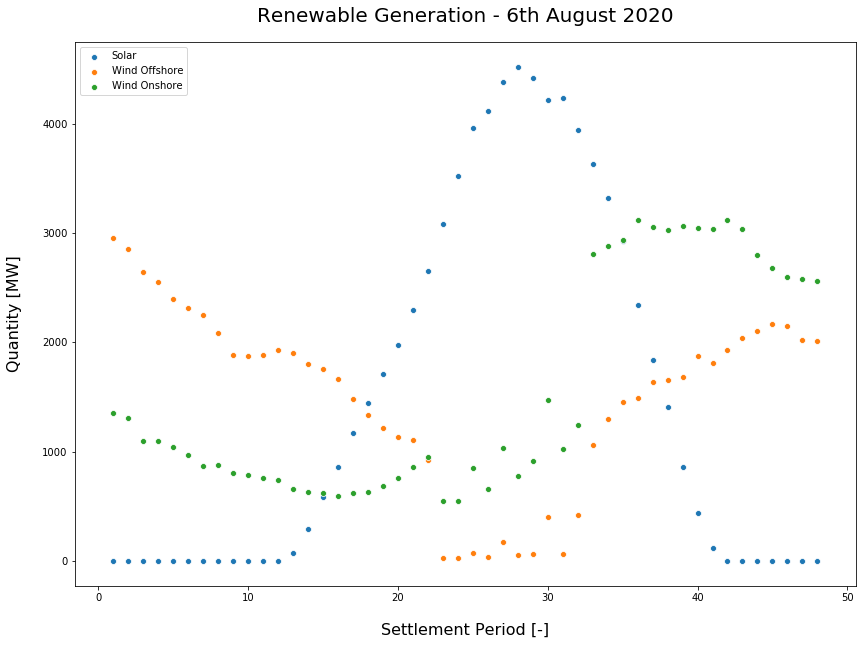

In [13]:
# Plot Renwable Generation for one day

# Filter for one day
renewable_filtered_df = renewable_df[renewable_df['setDate'] == '2020-08-06']

plt.figure(figsize =(14, 10))

# Plot generation
for pow_type, data in renewable_filtered_df.groupby('powType'):
    sns.scatterplot(data = data, x = "setPeriod", y = "quantity", label = pow_type)

# Set title, axes, legend
plt.title("Renewable Generation - 6th August 2020", fontsize = 20, pad = 20)
plt.xlabel("Settlement Period [-]", fontsize = 16, labelpad = 20)
plt.ylabel("Quantity [MW]", fontsize = 16, labelpad = 20)
plt.legend(loc ="upper left")

plt.show()

In [15]:
renewable_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6252 entries, 0 to 22923
Data columns (total 15 columns):
id            6252 non-null object
docType       6252 non-null object
busType       6252 non-null object
proType       6252 non-null object
timeId        6252 non-null object
quantity      6252 non-null float64
curveType     6252 non-null object
resolution    6252 non-null object
setDate       6252 non-null object
setPeriod     6252 non-null float64
powType       6252 non-null object
actFlag       6252 non-null object
docId         6252 non-null object
docRevNum     6252 non-null object
_ts           6252 non-null int64
dtypes: float64(2), int64(1), object(12)
memory usage: 781.5+ KB


In [ ]:
# Add df column 


def calculate_ratio(inlet_temp, exhaust_temp):
    return exhaust_temp/inlet_temp

inlet_exhaust_ratio_data['Exh/Intake Ratio'] = inlet_exhaust_ratio_data.apply(lambda row: calculate_ratio(row['t50RecuperatorHPairOutlet_Avg'], row['t58ExhaustPort_Avg']), axis = 1)